In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# I) PREPARING & CLEANING

## I.1) Grouping the different sheets that ar part of the workbook

In [10]:
'''
# Ruta del archivo Excel de entrada
archivo_entrada = './data/raw data.xlsx'

# Cargar todas las hojas en un diccionario
hojas = pd.read_excel(archivo_entrada, sheet_name=None)

# Unir todas las hojas en un solo DataFrame
df_completo = pd.concat(hojas.values(), ignore_index=True)

# Guardar el DataFrame combinado en un nuevo archivo Excel
archivo_salida = './data/raw data mixed.xlsx'
df_completo.to_excel(archivo_salida, index=False)

print(f"Las hojas fueron combinadas exitosamente en {archivo_salida}")
'''

Las hojas fueron combinadas exitosamente en ./data/raw data mixed.xlsx


## I.1) Manual edition: due errors by users, correction was need once every sheet is in a one workbook

In [5]:
path = './data/prepared data mixed.xlsx' 
df = pd.read_excel(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Numero OT                          3053 non-null   object
 1   Fecha recepcion                    3053 non-null   object
 2   Cliente                            3051 non-null   object
 3   Tipo de ingreso                    3039 non-null   object
 4   Responsable de ingreso             3040 non-null   object
 5   Descripcion del proyecto           3048 non-null   object
 6   Dimensiones [mm] anchoxlargoxalto  1384 non-null   object
dtypes: object(7)
memory usage: 167.1+ KB


In [6]:
#df = df.iloc[:,:7]
#df = df.dropna(axis = 1, how = 'all')
df = df.sort_values(by = 'Fecha recepcion')
df = df.reset_index(drop=True)
df

,Numero OT,Fecha recepcion,Cliente,Tipo de ingreso,Responsable de ingreso,Descripcion del proyecto,Dimensiones [mm] anchoxlargoxalto
0,5580,2021-03-02,All Pack,Nuevo,Gustavo Martinez,Kit de sello,NaN
1,5579,2021-03-02,Frau Albors,Nuevo,Gustavo Martinez,Cilindro hidráulico,NaN
2,5581,2021-03-02,Olivos del valle,NaN,Gustavo Martinez,Con coe,NaN
3,5584,2021-03-03,AGV,Nuevo,Gustavo Martinez,Chik de china,NaN
4,5582,2021-03-03,Capra,Nuevo,Gustavo Martinez,Motor de traslación,NaN
...,...,...,...,...,...,...,...
3048,8328,2025-01-27,TECSESI (techint),Nuevo,Guillermo Sanchez,martillo hidráulico 771045,350x1400x800
3049,8327,2025-01-27,TECSESI (techint),Nuevo,Guillermo Sanchez,martillo hidráulico E&W RX18,600x3300x750
3050,8331,2025-01-27,TECSESI (techint),Nuevo,Guillermo Sanchez,criquet hidroneumático ph30-c,NaN
3051,8330,2025-01-27,TECSESI (techint),Nuevo,Guillermo Sanchez,criquet hidroneumático torletti,NaN


## I.3) EXPLORATION

- ### **a) How many clients the company have?**

In [7]:
df['Cliente'] = df['Cliente'].str.upper()
df['Cliente'].value_counts()

Cliente
MINA PIRQUITAS                    235
YMAD                              154
FINNING                            94
HOLCIM                             85
L'EQUIPE MONTEUR                   81
                                 ... 
TRANS PUCARA                        1
PRITTY SALDAN                       1
LUCANA CONSTRUCCIONES               1
FSVIAL                              1
JUAN MARTIN OLIVEIRA CABALEIRO      1
Name: count, Length: 485, dtype: int64

### We found:
- ### *There is 485 different clients*
- ### *Most common customer: Mina Pirquitas (~7.7% of all the projects)**

(*) Because, so far, the company count 3053 projects. Counting since the beginning of 2021.


- ### **b) How many projects by year & month take the company?**

In [67]:
df['año'] = df['Fecha recepcion'].str.split('-', expand = True)[0] 
df['año y mes'] = df['Fecha recepcion'].str.split('-', expand = True)[0] + '-' + df['Fecha recepcion'].str.split('-', expand = True)[1]
df.head(4)

,Numero OT,Fecha recepcion,Cliente,Tipo de ingreso,Responsable de ingreso,Descripcion del proyecto,Dimensiones [mm] anchoxlargoxalto,año,año y mes
0,5580,2021-03-02,ALL PACK,NUEVO,Gustavo Martinez,Kit de sello,NaN,2021,2021-03
1,5579,2021-03-02,FRAU ALBORS,NUEVO,Gustavo Martinez,Cilindro hidráulico,NaN,2021,2021-03
2,5581,2021-03-02,OLIVOS DEL VALLE,NaN,Gustavo Martinez,Con coe,NaN,2021,2021-03
3,5584,2021-03-03,AGV,NUEVO,Gustavo Martinez,Chik de china,NaN,2021,2021-03


In [70]:
df['Tipo de ingreso'] = df['Tipo de ingreso'].str.upper()
df['Tipo de ingreso'].unique()

array(['NUEVO', nan, 'RECLAMO', 'REINGRESO'], dtype=object)

In [81]:
# TOTAL of projects
df_pj_tot = df['año y mes'].value_counts() # This returns a Series
df_pj_tot = df_pj_tot.sort_index()
df_pj_tot = df_pj_tot.to_frame(name='TOTAL') # This turns the series into a pandas dataframe
#df_pj_total

In [82]:
# Projects that are NEW
df_pj_new = df[df['Tipo de ingreso'] == 'NUEVO']['año y mes'].value_counts() #df['año y mes'].value_counts() # This returns a Series
df_pj_new = df_pj_new.sort_index()
df_pj_new = df_pj_new.to_frame(name='NUEVOS') # This turns the series into a pandas dataframe
#df_pj_new

In [83]:
# Projects that are COMPLAINS
df_pj_com = df[df['Tipo de ingreso'] == 'RECLAMO']['año y mes'].value_counts() #df['año y mes'].value_counts() # This returns a Series
df_pj_com = df_pj_com.sort_index()
df_pj_com = df_pj_com.to_frame(name='RECLAMO') # This turns the series into a pandas dataframe

# Projects that are RE-ENTER:
df_pj_ree = df[df['Tipo de ingreso'] == 'REINGRESO']['año y mes'].value_counts() #df['año y mes'].value_counts() # This returns a Series
df_pj_ree = df_pj_ree.sort_index()
df_pj_ree = df_pj_ree.to_frame(name='REINGRESO') # This turns the series into a pandas dataframe

In [79]:
df['Tipo de ingreso'].unique()

array(['NUEVO', nan, 'RECLAMO', 'REINGRESO'], dtype=object)

### Concatenate: the datasets

In [89]:
df_pj = pd.concat([df_pj_tot, df_pj_new, df_pj_com, df_pj_ree], axis=1)
df_pj = df_pj.fillna(0)
df_pj.describe()

,TOTAL,NUEVOS,RECLAMO,REINGRESO
count,47.000000,47.000000,47.000000,47.000000
mean,64.957447,59.936170,1.382979,3.340426
std,18.585826,16.980045,1.973225,3.073566
min,29.000000,28.000000,0.000000,0.000000
25%,52.000000,49.000000,0.000000,1.000000
50%,66.000000,61.000000,1.000000,2.000000
75%,74.000000,69.000000,2.000000,4.500000
max,106.000000,101.000000,10.000000,15.000000


"\nplt.xticks(rotation=45)\nplt.legend()\nplt.xlabel('X label')\nplt.ylabel('Y label')\n#plt.ylim(-10,40)\nplt.show()\n"

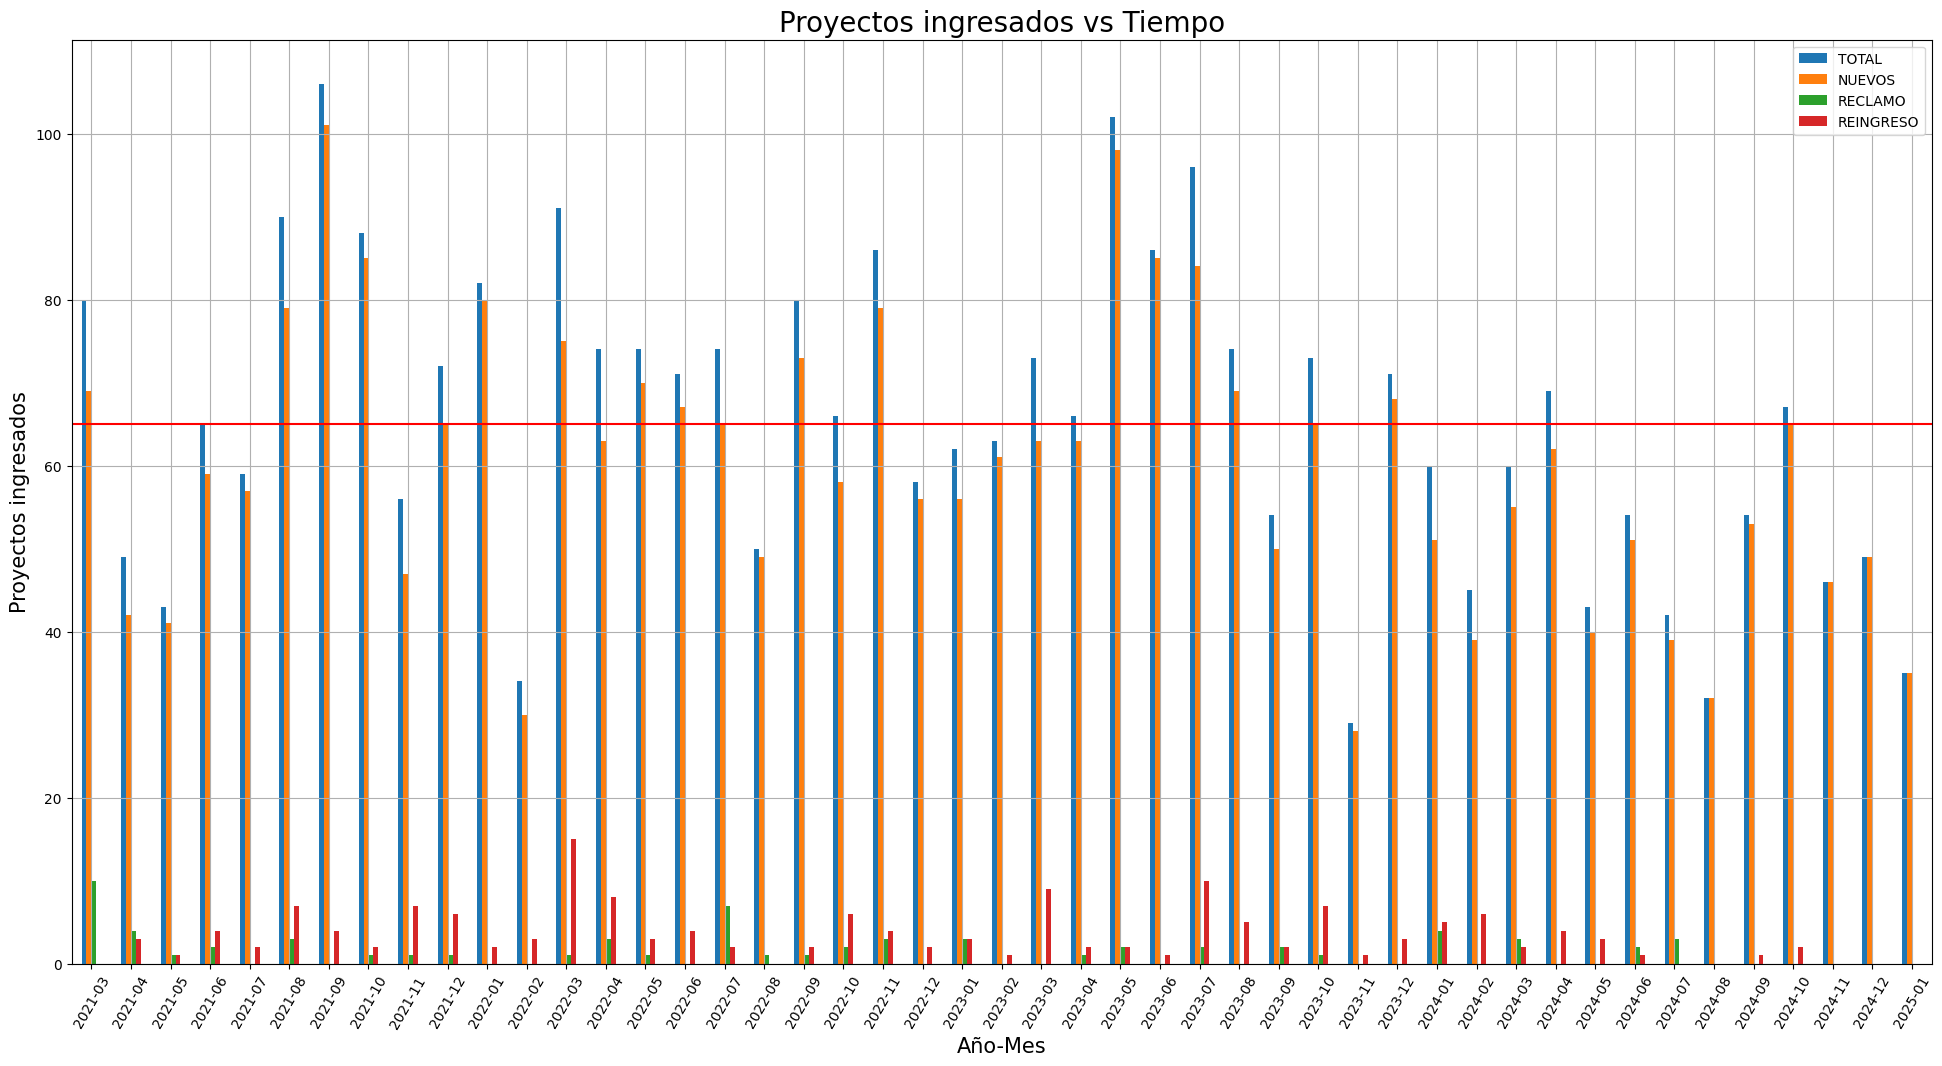

In [90]:
# Plotting the results -----------
df_pj.plot(figsize = (24,12), kind = 'bar', grid = True, rot = 60)
plt.xlabel('Año-Mes', size = 15)
plt.ylabel('Proyectos ingresados', size = 15)
plt.title('Proyectos ingresados vs Tiempo', size = 20)

# Horizontal line
yline = round(df_pj['TOTAL'].mean(), 0)
plt.axhline(y=yline, color='r', linestyle='-')

'''
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('X label')
plt.ylabel('Y label')
#plt.ylim(-10,40)
plt.show()
'''

### Turning the previous dataset into percent:

In [100]:
round((df_pj['NUEVOS'] / df_pj['TOTAL'])*100, 1) #/ df_pj.iloc[:,:1]

año y mes
2021-03     86.2
2021-04     85.7
2021-05     95.3
2021-06     90.8
2021-07     96.6
2021-08     87.8
2021-09     95.3
2021-10     96.6
2021-11     83.9
2021-12     90.3
2022-01     97.6
2022-02     88.2
2022-03     82.4
2022-04     85.1
2022-05     94.6
2022-06     94.4
2022-07     87.8
2022-08     98.0
2022-09     91.2
2022-10     87.9
2022-11     91.9
2022-12     96.6
2023-01     90.3
2023-02     96.8
2023-03     86.3
2023-04     95.5
2023-05     96.1
2023-06     98.8
2023-07     87.5
2023-08     93.2
2023-09     92.6
2023-10     89.0
2023-11     96.6
2023-12     95.8
2024-01     85.0
2024-02     86.7
2024-03     91.7
2024-04     89.9
2024-05     93.0
2024-06     94.4
2024-07     92.9
2024-08    100.0
2024-09     98.1
2024-10     97.0
2024-11    100.0
2024-12    100.0
2025-01    100.0
dtype: float64